# IMAGEN - ERROR ANALYSIS
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

Such in-depth understanding can be achieved by performing follow-up analysis such as: <br>

## Overview


## Error Analysis

In [1]:
################################################################################
""" IMAGEN - ERROR ANALYSIS """
# Author : JiHoon Kim, <jihoon.kim@fu-berlin.de>, 16th August 2021
#
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotResults import *

### 1. Visualization

#### 1.1 probabilitiy distributions

In [2]:
df = pd.read_csv(sorted(glob("results/newlbls-fu3-espad-fu3-19a-binge-*/*/run.csv"))[-1])

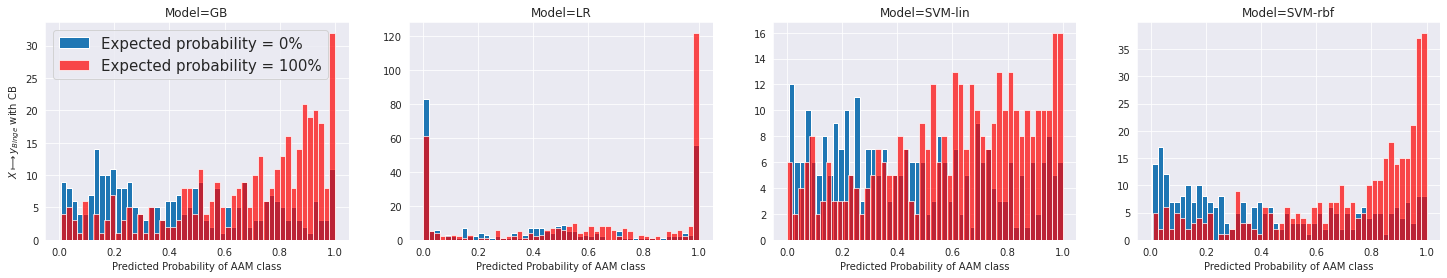

In [3]:
grp_order = ["io", "technique", "model"]
groups = df.groupby(grp_order)   
n_models = len(df["model"].unique())
n_rows = round(len(groups)/n_models)
fig, axes = plt.subplots(n_rows, n_models, 
                         sharex=True, sharey=False,
                         figsize=(25, n_models*n_rows))
axes = np.ravel(axes)
        
for i, (g, dfi) in enumerate(groups):
    ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
    assert ids_all.shape[0] == np.unique(ids_all).shape[0]
    probs_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])
    y_all = np.array([y_lists for y in dfi["test_lbls"] for y_lists in eval(y)])
    assert probs_all.shape[0] == y_all.shape[0]

    prediction=probs_all[:,1]
    ax = axes[i]
    ax.hist(prediction[y_all==0], bins=50, label='Expected probability = 0%')
    ax.hist(prediction[y_all==1], bins=50, label='Expected probability = 100%', alpha=0.7, color='r')
    ax.set_xlabel('Predicted Probability of AAM class')
    if i%n_models == 0:
        ax.set_ylabel("{} with {}".format(remap_io(dfi.iloc[0]), g[1].upper()))
    if i == 0:
        ax.legend(fontsize=15)
    ax.set_title("Model={}".format(g[-1]))
    
plt.show()

### 2. Performance across sites

#### 2.1 main experiment

In [4]:
df = pd.read_csv(sorted(glob("results/newlbls-fu3-espad-fu3-19a-binge-*/*/run.csv"))[-1])

In [5]:
grp_order = ["io", "technique", "model"]
groups = df.groupby(grp_order)   

In [6]:
# lists generator
for i, (g, dfi) in enumerate(groups):
    if g[2] == 'SVM-lin':
        model = 'SVM_lin'
    elif g[2] == 'SVM-rbf':
        model = 'SVM_rbf'
    else:
        model = g[2]
    ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
    lbls_all = np.array([lbls_lists for lbls in dfi["test_lbls"] for lbls_lists in eval(lbls)])
    predict_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])[:,1]
    globals()[f'{g[0][2:]}_{g[1]}_{model}_test_ids_all'] = ids_all
    globals()[f'{g[0][2:]}_{g[1]}_{model}_test_lbls_all'] = lbls_all
    globals()[f'{g[0][2:]}_{g[1]}_{model}_test_probs_all'] = predict_all
    print(g)
    print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_ids_all')
    print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_lbls_all')
    print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_probs_all')

    for j in dfi["trial"]:
        ids_part = np.array(eval([ids for ids in dfi["test_ids"]][j]))
        lbls_part = np.array(eval([ids for ids in dfi["test_lbls"]][j]))
        predict_part = np.array(eval([ids for ids in dfi["test_probs"]][j]))[:,1]
        globals()[f'{g[0][2:]}_{g[1]}_{model}_test_ids_{j}'] = ids_part
        globals()[f'{g[0][2:]}_{g[1]}_{model}_test_lbls_{j}'] = lbls_part
        globals()[f'{g[0][2:]}_{g[1]}_{model}_test_probs_{j}'] = predict_part
        print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_ids_{j}')
        print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_lbls_{j}')
        print(f'Variable: {g[0][2:]}_{g[1]}_{model}_test_probs_{j}')
    print('')

('X-Binge', 'cb', 'GB')
Variable: Binge_cb_GB_test_ids_all
Variable: Binge_cb_GB_test_lbls_all
Variable: Binge_cb_GB_test_probs_all
Variable: Binge_cb_GB_test_ids_0
Variable: Binge_cb_GB_test_lbls_0
Variable: Binge_cb_GB_test_probs_0
Variable: Binge_cb_GB_test_ids_1
Variable: Binge_cb_GB_test_lbls_1
Variable: Binge_cb_GB_test_probs_1
Variable: Binge_cb_GB_test_ids_2
Variable: Binge_cb_GB_test_lbls_2
Variable: Binge_cb_GB_test_probs_2
Variable: Binge_cb_GB_test_ids_3
Variable: Binge_cb_GB_test_lbls_3
Variable: Binge_cb_GB_test_probs_3
Variable: Binge_cb_GB_test_ids_4
Variable: Binge_cb_GB_test_lbls_4
Variable: Binge_cb_GB_test_probs_4
Variable: Binge_cb_GB_test_ids_5
Variable: Binge_cb_GB_test_lbls_5
Variable: Binge_cb_GB_test_probs_5
Variable: Binge_cb_GB_test_ids_6
Variable: Binge_cb_GB_test_lbls_6
Variable: Binge_cb_GB_test_probs_6

('X-Binge', 'cb', 'LR')
Variable: Binge_cb_LR_test_ids_all
Variable: Binge_cb_LR_test_lbls_all
Variable: Binge_cb_LR_test_probs_all
Variable: Binge_cb_LR

In [51]:
count_avg = 0
count_gb = 0
count_lr = 0
count_svm_lin = 0
count_svm_rbf = 0
all_1 = 0
all_0 = 0
wrong_1 = 0
wrong_0 = 0
all_1_ID = []
all_0_ID = []
wrong_1_ID = []
wrong_0_ID = []

for j in range(7):
    print(f"trials: {j}")
    for i, ids in enumerate(globals()[f"Binge_cb_GB_test_ids_{j}"]):
        ID = globals()[f"Binge_cb_GB_test_ids_{j}"][i]
        Y = globals()[f"Binge_cb_GB_test_lbls_{j}"][i]
        GB = globals()[f"Binge_cb_GB_test_probs_{j}"][i]
        LR = globals()[f"Binge_cb_LR_test_probs_{j}"][i]
        SVM_lin = globals()[f"Binge_cb_SVM_lin_test_probs_{j}"][i]
        SVM_rbf = globals()[f"Binge_cb_SVM_rbf_test_probs_{j}"][i]
        print("Predict:", ID, GB, LR, SVM_lin, SVM_rbf, "Real:", Y)
        if Y == (1.0 if (GB+LR+SVM_lin+SVM_rbf)/4 >= 0.5 else 0.0):
            count_avg += 1
            
        if Y == (1.0 if GB >= 0.5 else 0.0):
            count_gb += 1
        
        if Y == (1.0 if LR >= 0.5 else 0.0):
            count_lr += 1
        
        if Y == (1.0 if SVM_lin >= 0.5 else 0.0):
            count_svm_lin += 1
        
        if Y == (1.0 if SVM_rbf >= 0.5 else 0.0):
            count_svm_rbf += 1

        if Y == 1.0 == (1.0 if GB >= 0.5 else 0.0) == (1.0 if LR >= 0.5 else 0.0) == (1.0 if SVM_lin >= 0.5 else 0.0) == (1.0 if SVM_rbf >= 0.5 else 0.0):
            all_1 += 1
            all_1_ID.append(ids)
            
        if Y == 0.0 == (1.0 if GB >= 0.5 else 0.0) == (1.0 if LR >= 0.5 else 0.0) == (1.0 if SVM_lin >= 0.5 else 0.0) == (1.0 if SVM_rbf >= 0.5 else 0.0):
            all_0 += 1
            all_0_ID.append(ids)
            
        if Y != 1.0 == (1.0 if GB >= 0.5 else 0.0) == (1.0 if LR >= 0.5 else 0.0) == (1.0 if SVM_lin >= 0.5 else 0.0) == (1.0 if SVM_rbf >= 0.5 else 0.0):
            wrong_1 += 1
            wrong_1_ID.append(ids)
            
        if Y != 0.0 == (1.0 if GB >= 0.5 else 0.0) == (1.0 if LR >= 0.5 else 0.0) == (1.0 if SVM_lin >= 0.5 else 0.0) == (1.0 if SVM_rbf >= 0.5 else 0.0):
            wrong_0 += 1
            wrong_0_ID.append(ids)
        
        
            
#         print(, globals()[f"Binge_cb_GB_test_lbls_{j}"][i],
#               globals()[f"Binge_cb_GB_test_probs_{j}"][i], globals()[f"Binge_cb_LR_test_probs_{j}"][i],
#               globals()[f"Binge_cb_SVM_lin_test_probs_{j}"][i], globals()[f"Binge_cb_SVM_rbf_test_probs_{j}"][i])
#         print(i, globals()[f"Binge_cb_GB_test_ids_{j}"][i], globals()[f"Binge_cb_GB_test_probs_{j}"][i],
#               globals()[f"Binge_cb_GB_test_lbls_{j}"][i])
#         print(i, globals()[f"Binge_cb_LR_test_ids_{j}"][i], globals()[f"Binge_cb_LR_test_probs_{j}"][i],
#               globals()[f"Binge_cb_LR_test_lbls_{j}"][i])
#         print(i, globals()[f"Binge_cb_SVM_lin_test_ids_{j}"][i], globals()[f"Binge_cb_SVM_lin_test_probs_{j}"][i],
#               globals()[f"Binge_cb_SVM_lin_test_lbls_{j}"][i])
#         print(i, globals()[f"Binge_cb_SVM_rbf_test_ids_{j}"][i], globals()[f"Binge_cb_SVM_rbf_test_probs_{j}"][i],
#               globals()[f"Binge_cb_SVM_rbf_test_lbls_{j}"][i])
        #print("-"*83)
print(count_avg)
print(count_gb)
print(count_lr)
print(count_svm_lin)
print(count_svm_rbf)
print(all_1)
print(all_0)
print(wrong_1)
print(wrong_0)

trials: 0
Predict: 215284 0.8881000280380249 0.9995 0.9608 0.9901 Real: 0.0
Predict: 308867 0.9613000154495239 0.9984 0.9063 0.9516 Real: 1.0
Predict: 469693 0.14270000159740448 0.0253 0.1254 0.1988 Real: 1.0
Predict: 1781386 0.18230000138282776 0.0025 0.0838 0.1598 Real: 1.0
Predict: 4908925 0.9799000024795532 1.0 0.9971 1.0 Real: 0.0
Predict: 7062184 0.478300005197525 0.0 0.0021 0.4281 Real: 1.0
Predict: 7347207 0.9498000144958496 0.9887 0.9049 0.9786 Real: 1.0
Predict: 7839943 0.5005999803543091 0.8944 0.8222 0.3102 Real: 1.0
Predict: 9808250 0.25839999318122864 0.0324 0.1365 0.149 Real: 0.0
Predict: 10867560 0.03700000047683716 0.7917 0.6369 0.2142 Real: 1.0
Predict: 12764460 0.15760000050067902 0.8334 0.8064 0.5157 Real: 0.0
Predict: 15439849 0.9309999942779541 0.9257 0.558 0.9222 Real: 0.0
Predict: 15526050 0.7940000295639038 0.9824 0.9396 0.9252 Real: 1.0
Predict: 16635570 0.90420001745224 0.75 0.6918 0.985 Real: 1.0
Predict: 20841951 0.5162000060081482 0.9508 0.7883 0.3386 Real

In [52]:
print(len(wrong_1_ID), wrong_1_ID)

55 [215284, 4908925, 15439849, 25492584, 27363295, 27511167, 34196193, 40302134, 42728834, 67609815, 82594744, 13646768, 16140261, 36529694, 39710910, 43217738, 44284703, 46806317, 61561596, 23746158, 30151696, 53912748, 54766461, 56671932, 56864858, 57172435, 64082948, 86977385, 87302305, 14786947, 29236228, 32642894, 34410504, 48731895, 73639449, 82484651, 43926786, 55960242, 56595836, 69029254, 75751859, 76098819, 97067339, 7764421, 14803670, 57135861, 68649293, 79815065, 90994778, 93455698, 99344314, 18801650, 57541508, 59343528, 75315363]


In [53]:
print(len(wrong_0_ID), wrong_0_ID)

37 [469693, 1781386, 7062184, 20879424, 32585091, 52506288, 55757334, 59951813, 83550867, 84247324, 31834764, 84675654, 92381250, 97096149, 112288, 51445049, 52356720, 78301795, 85724167, 29280369, 38728463, 42855921, 44103403, 51671690, 94878465, 99873252, 57533759, 40756667, 47245633, 55982442, 59325249, 97967328, 20278160, 27858889, 66086086, 92432902, 99433083]


In [12]:
for j in range(7):
    print(globals()[f"Binge_cb_GB_test_ids_{j}"])

[  215284   308867   469693  1781386  4908925  7062184  7347207  7839943
  9808250 10867560 12764460 15439849 15526050 16635570 20841951 20879424
 21729241 22886093 23426080 23818066 25254435 25492584 26461756 26545049
 27074970 27363295 27511167 30385648 31130729 31853606 32569118 32585091
 33925730 34196193 34924989 35587656 35620929 38221741 40302134 41213271
 42255049 42728834 43559294 44982406 45838081 47117408 52506288 55757334
 55760095 55906043 59951813 60577054 61137506 61504177 62050071 62960940
 66457327 67110223 67528603 67593241 67609815 67659985 68764347 69026991
 69795852 69895644 71218732 71766352 73312240 73691245 74104786 75148743
 76254920 77660233 80955255 81092960 82594744 83550867 84247324 84791358
 86116554 86716306 87063383 87695151 90314183 90651669 92458933 94768500
 95886795 96358046 98232403 98442422 99616225]
[  737577   871047  4004697  5352545  5839877  6905767  7779851  7836916
  7965462  8996449 12029891 13325745 13646768 14084077 14850118 15312177
 160

In [ ]:
################################################################################
from imagen_instrumentloader import *
from imagen_plot_statistics import *
# DATA_DIR = '/ritter/share/data/IMAGEN'

In [ ]:
binge_FU3_NEO = IMAGEN_instrument()
df_binge_FU3_NEO, col_binge_FU3_NEO = binge_FU3_NEO.to_instrument(
    "newlbls-fu3-espad-fu3-19a-binge-n650.h5", # h5files
    "FU3",                                     # session
    "IMAGEN-IMGN_NEO_FFI_FU3.csv",             # instrument
    "NEO",                                     # roi name
    save = False,                               # save
    viz = False)                                # summary

# binge_FU3_NEO = IMAGEN_quick()
# df_binge_FU3_NEO, col_binge_FU3_NEO = binge_FU3_NEO.to_instrument(
#     "newlbls-fu3-espad-fu3-19a-binge-n650_FU3_NEO.csv", # instrument
#     viz = True)                                         # summary

In [ ]:
DF = df_binge_FU3_NEO
COL = col_binge_FU3_NEO

plot_binge_FU3_NEO = IMAGEN_descriptive(DF, COL)
plot_binge_FU3_NEO.violinplot()

In [ ]:
DF = df_binge_FU3_NEO.loc[[308867, 7347207, 15526050, 16635570, 21729241, 23818066, 31853606, 45838081, 47117408, 55906043, 62050071, 62960940, 66457327, 67528603, 69026991, 69795852, 74104786, 77660233, 84791358, 87063383, 94768500, 871047, 4004697, 5352545, 6905767, 7836916, 7965462, 13325745, 14850118, 16010156, 16069129, 17743852, 19381646, 28264513, 36043675, 38965837, 46226352, 47755403, 49850700, 63301798, 67488444, 67854391, 68717425, 69548777, 72869403, 82047033, 83194915, 83656920, 91501582, 96466079, 2485525, 5879696, 6502630, 15765805, 18094307, 19031295, 21245205, 24786016, 25067315, 25527440, 32062629, 33433011, 37805580, 43968174, 46161596, 52071148, 52172018, 52352041, 55440249, 56819618, 60334165, 60774324, 73231355, 78836365, 87298622, 92260456, 4941007, 10847852, 14232183, 14837805, 18750014, 18983258, 23343892, 23875871, 26193033, 30649663, 45863294, 49148426, 55203542, 56117209, 65007029, 70769969, 73236450, 74846837, 77511665, 80232105, 86644823, 87747553, 91362411, 92126350, 94265316, 97970921, 297685, 1647364, 3287674, 5446254, 10646873, 12485016, 12809392, 14759699, 18198634, 26876093, 41548748, 44576096, 44753182, 45243088, 45376266, 45531867, 47157916, 47381951, 49433852, 52801880, 60919135, 61588737, 63961493, 72628887, 79630427, 86549823, 92186097, 2660085, 2904393, 5432841, 5877888, 10295754, 10482778, 16634839, 22245441, 30383377, 33691855, 34829301, 41266477, 48284598, 48935365, 55104004, 65620046, 73113515, 78035648, 84037702, 90945437, 92318687, 97329782, 2996147, 6006399, 8773013, 16908046, 19543161, 22819584, 23207511, 29614424, 36973832, 38264758, 40021391, 44104406, 48846112, 52045472, 65241453, 67342911, 69159223, 75465686, 76847922, 79319968, 80856937, 84724166, 89971463, 91038192, 92075592, 92744330, 94345446]+[9808250, 22886093, 26461756, 27074970, 31130729, 32569118, 33925730, 35620929, 71218732, 75148743, 76254920, 80955255, 81092960, 86116554, 87695151, 96358046, 14084077, 36383037, 39923280, 48908846, 54741718, 58060181, 74179558, 77857132, 80780783, 91474448, 99930021, 1720362, 12715429, 31851798, 36160199, 38793721, 39253420, 47501131, 61589239, 66715400, 75760021, 78410552, 80214993, 80609714, 86076571, 90561418, 99514690, 10974785, 15734458, 19767886, 35490507, 52904972, 57105753, 59017806, 61499631, 64233992, 64851530, 73668053, 80301458, 83037309, 85791572, 89179801, 96804971, 14034138, 20537630, 24709811, 25410823, 28852607, 32617813, 33545889, 53260245, 57930100, 61581707, 65084605, 71039594, 80303743, 83749433, 88964325, 2109942, 16275727, 17819722, 19767938, 21757796, 22456630, 29257136, 57847102, 61538083, 69973472, 70675464, 72824399, 82880964, 93697047, 95958758, 2437251, 4631192, 12988699, 28127454, 30395922, 33272497, 37509984, 39838208, 41765496, 42749560, 51293841, 76936765, 80627914, 83248719, 86458347, 95263539, 98600208], :]
COL = col_binge_FU3_NEO

plot_binge_FU3_NEO = IMAGEN_descriptive(DF, COL)
plot_binge_FU3_NEO.violinplot()

In [ ]:
DF = df_binge_FU3_NEO.loc[[215284, 4908925, 15439849, 25492584, 27363295, 27511167, 34196193, 40302134, 42728834, 67609815, 82594744, 13646768, 16140261, 36529694, 39710910, 43217738, 44284703, 46806317, 61561596, 23746158, 30151696, 53912748, 54766461, 56671932, 56864858, 57172435, 64082948, 86977385, 87302305, 14786947, 29236228, 32642894, 34410504, 48731895, 73639449, 82484651, 43926786, 55960242, 56595836, 69029254, 75751859, 76098819, 97067339, 7764421, 14803670, 57135861, 68649293, 79815065, 90994778, 93455698, 99344314, 18801650, 57541508, 59343528, 75315363]+[469693, 1781386, 7062184, 20879424, 32585091, 52506288, 55757334, 59951813, 83550867, 84247324, 31834764, 84675654, 92381250, 97096149, 112288, 51445049, 52356720, 78301795, 85724167, 29280369, 38728463, 42855921, 44103403, 51671690, 94878465, 99873252, 57533759, 40756667, 47245633, 55982442, 59325249, 97967328, 20278160, 27858889, 66086086, 92432902, 99433083], :]
COL = col_binge_FU3_NEO

plot_binge_FU3_NEO = IMAGEN_descriptive(DF, COL)
plot_binge_FU3_NEO.violinplot()